<a href="https://colab.research.google.com/github/Indukurivigneshvarma/Deep_Learning/blob/main/Time_Series/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip uninstall prophet pystan cmdstanpy -y
!pip install prophet cmdstanpy  -q
from IPython.display import clear_output
clear_output(wait=True)

Found existing installation: prophet 1.2.1
Uninstalling prophet-1.2.1:
  Successfully uninstalled prophet-1.2.1
Found existing installation: cmdstanpy 1.3.0
Uninstalling cmdstanpy-1.3.0:
  Successfully uninstalled cmdstanpy-1.3.0


In [3]:
from prophet import Prophet

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)

df.columns = df.columns.str.strip().str.capitalize()

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('D')

In [6]:
print("Missing values before fix:", df['Temp'].isna().sum())

df['Temp'] = df['Temp'].fillna(method='ffill')

print("Missing values after fix:", df['Temp'].isna().sum())

Missing values before fix: 2
Missing values after fix: 0


/tmp/ipython-input-832157111.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Temp'] = df['Temp'].fillna(method='ffill')


In [7]:
prophet_df = df.reset_index().rename(columns={'Date': 'ds', 'Temp': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

In [8]:
print(prophet_df.head())

          ds     y
0 1981-01-01  20.7
1 1981-01-02  17.9
2 1981-01-03  18.8
3 1981-01-04  14.6
4 1981-01-05  15.8


In [9]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='additive'
)
model.fit(prophet_df)


In [10]:
print(prophet_df.columns)
print(prophet_df.head())

Index(['ds', 'y'], dtype='object')
          ds     y
0 1981-01-01  20.7
1 1981-01-02  17.9
2 1981-01-03  18.8
3 1981-01-04  14.6
4 1981-01-05  15.8


In [11]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

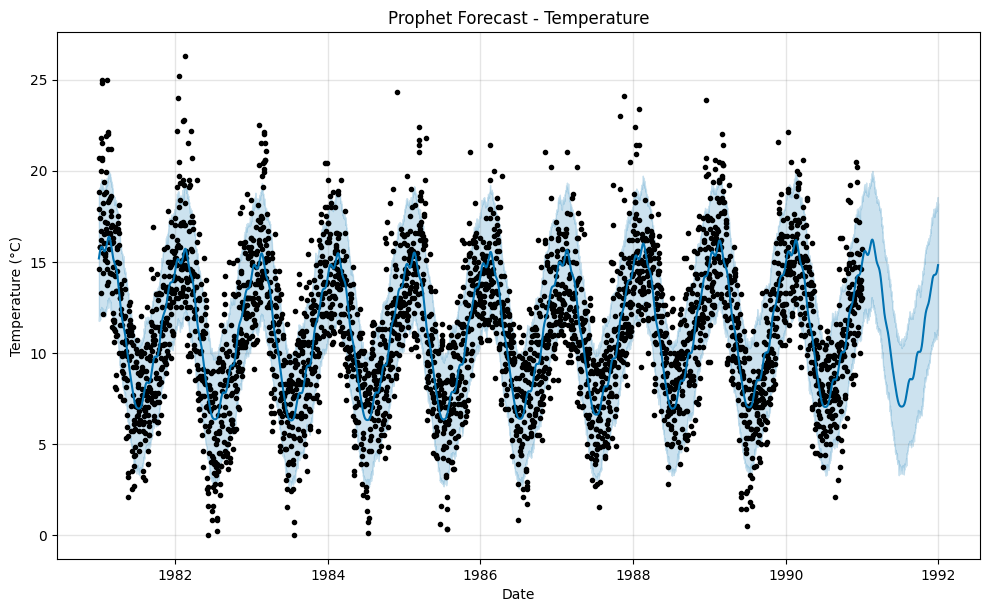

In [12]:
fig1 = model.plot(forecast)
plt.title('Prophet Forecast - Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

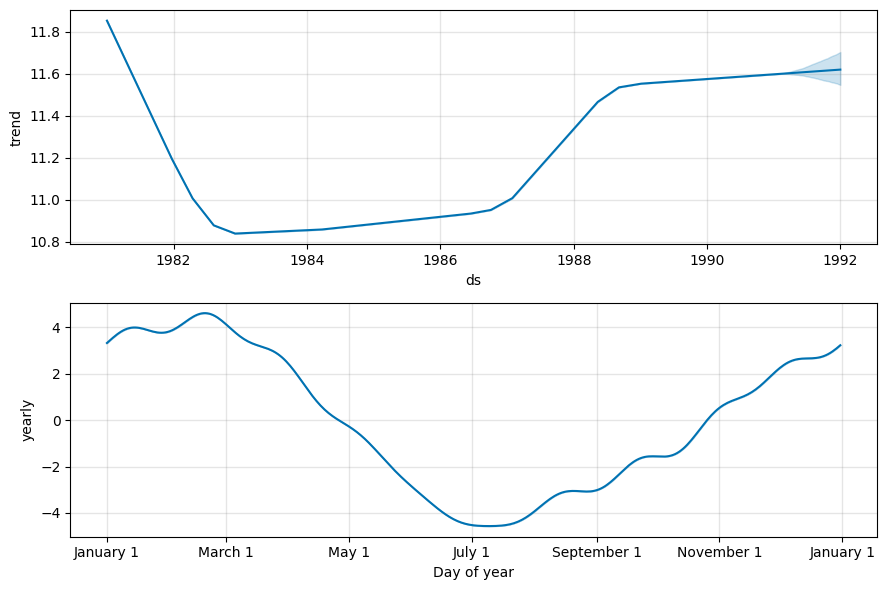

In [13]:
fig2 = model.plot_components(forecast)
plt.show()